## Synthoseis Quick Start Notebook

Synthoseis is an open source, Python-based tool used for generating pseudo-random seismic data. The goal of Synthoseis is to generate realistic seismic data for deep learning training. This notebook will serve as a guide to getting your first Synthoseis model up and running. Future notebooks will discuss seismic outputs, visualizations, and building a custom rock properties model.

### Environment Build

To install the necessary packages, use the `environment.yml` file to create a virtual or conda environment. Please note that the most recent version of Synthoseis has been refactored to work with Python 3.10.

### Imports

Within the main directory of the repo is a script called `main.py`. This is the primary script to run the program. Import `main.py`, along with visualization tools to view the results.

In [22]:
import main as mn 
import numpy as np
import json
import pprint as pp
import matplotlib.pyplot as plt

### Building your first model

The config json file is the method for defining some of the key aspects of your seismic survey including survey size, seismic bandwith, column height range, number of faults, sand thickness ranges, and the presence of geobodies like salt and channels. Please note that setting `include_channels: True` will signifcantly increase compute time and memory consumption. Below is an example config file that can be found in `./config/example.json`.

In [23]:
path = './config/smooth/example.json'
rock_model = json.load(open(path, 'r'))
pp.pprint(rock_model)

{'bandwidth_high': [60.0, 65.0],
 'bandwidth_low': [10.0, 15.0],
 'bandwidth_ord': 4,
 'basin_floor_fans': False,
 'broadband_qc_volume': False,
 'closure_types': ['simple', 'faulted', 'onlap'],
 'cube_shape': [64, 64, 256],
 'digi': 4,
 'dip_factor_max': 1,
 'extra_qc_plots': True,
 'incident_angles': [0],
 'include_channels': False,
 'include_salt': True,
 'infill_factor': 10,
 'initial_layer_stdev': [5.0, 10.0],
 'max_column_height': [150.0, 150.0],
 'max_number_faults': 6,
 'min_closure_voxels_faulted': 2500,
 'min_closure_voxels_onlap': 500,
 'min_closure_voxels_simple': 500,
 'min_number_faults': 1,
 'model_qc_volumes': False,
 'multiprocess_bp': True,
 'pad_samples': 10,
 'partial_voxels': True,
 'project': 'example',
 'project_folder': '/raid/ridhwan/synthoseis/synthoseis_example',
 'sand_layer_fraction': {'max': 0.25, 'min': 0.05},
 'sand_layer_thickness': 2,
 'seabed_min_depth': [20, 50],
 'signal_to_noise_ratio_db': [20.5, 30.5, 35.5],
 'thickness_max': 25,
 'thickness_min':

### Running the model

Once you've defined the parameters of your seismic data, call the `build_model()` function in `main.py`. This will take the config `.json` file as an input, as well as a `run_id` defined by the user. Users also have the option to use `test_mode`. Test mode can take an integer as an input and returns a smaller seismic volume than defined in the config file. This is great for testing prior to running the full size model.

In [24]:
mn.build_model(user_json=path, run_id=5)

No coherent noise will be inserted
Salt will be inserted. noise_stretch_factor = 1.16

Model folder: /raid/ridhwan/synthoseis/synthoseis_example/seismic__2025.61210465_5
Creating directory: /raid/ridhwan/synthoseis/synthoseis_example/seismic__2025.61210465_5
Creating directory: /raid/ridhwan/synthoseis/temp_folder__2025.61210465_5

Keyfile created at /raid/ridhwan/synthoseis/synthoseis_example/seismic__2025.61210465_5/seismicCube_2025.61210465.key
self.cfg.num_lyr_lut =  5120
onlap_layer_list =  [0 2 4]
Number of onlapping flags: 3
 ... horizon number for first onlap episode = 0
 ... number of channelFlags: 0
 ... horizon number for first channel episode: 0
	Indices for shallowest point in cube: 17, 60
Building random depth map at base of model
azi, dip, dipping_plane min/mean/max = 214.91573557438545, 0.0004247907025396458, 0.00, 0.00, 0.00
current_depth_map min/mean/max = 2478.09, 2622.45, 2704.12
thickness_map min/mean/max = 7.49, 67.54, 112.95
Layer 0, depth_maps.shape = (64, 64)
B

  0%|          | 0/1 [00:00<?, ?it/s]



 ... inserting fault 0 with throw 9.56
   ... fault ellipsoid semi-axes (a, b, c): 263.74, 107.17, 1164.83
   ... fault ellipsoid origin (x, y, z): 217.68, -55.75, -111.73
   ... tilt_pct: 58.48
   ...z for bottom of ellipsoid at depth (samples) = -130143.0
   ...shape of output_cube = (64, 64, 266)
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.0
   ...gouge_pctile (percent*100) = 21.69568944765885
   .... output_cube.shape = (64, 64, 266)
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (266,)
   ... Computing fault middle to hang max displacement function
    ... x idx for max displacement  =  49
    ... y idx for max displacement  =  1
    ... z idx for max displacement  =  65
    ... ellipsoid value  =  1.00541462130194
    ... Computing fault depth at max displacement
    ... depth at max displacement  = 65
    ... This fault has  3.0% of downthrown samples
   ... Taper fault so it doesn't reach seabed
    ... Sea floor max = 72.00

100%|██████████| 1/1 [00:02<00:00,  2.33s/it]

   ...hockey_sticks = , [0]
   ... elapsed time for skimage.label = 0:00:00.004632
   ... number_fault_intersections = 0
	   ... Cube parameters going into interpolation
	   ... Origtime shape  = 266
	   ... stretch_times_effects shape  = (64, 64, 266)
	   ... unstretch_times shape  = (64, 64, 266)
	   ... traces shape  = (64, 64, 266)
	   ... Cube parameters going into interpolation
	   ... Origtime shape  = 266
	   ... stretch_times_effects shape  = (64, 64, 266)
	   ... unstretch_times shape  = (64, 64, 266)
	   ... traces shape  = (64, 64, 266)


 ... ihor, improved_map_onlap_segments[improved_map_onlap_segments>0.].shape, improved_zmap_thickness[improved_zmap_thickness==0].shape =  37 (0,) (388,)
 ... ihor, improved_map_onlap_segments[improved_map_onlap_segments>0.].shape, improved_zmap_thickness[improved_zmap_thickness==0].shape =  36 (0,) (110,)
 ... ihor, improved_map_onlap_segments[improved_map_onlap_segments>0.].shape, improved_zmap_thickness[improved_zmap_thickness==0].shape =  35 (0,) (0,)
 ... ihor, improved_map_onlap_segments[improved_map_onlap_segments>0.].shape, improved_zmap_thickness[improved_zmap_thickness==0].shape =  34 (0,) (0,)
 ... ihor, improved_map_onlap_segments[improved_map_onlap_segments>0.].shape, improved_zmap_thickness[improved_zmap_thickness==0].shape =  33 (0,) (0,)
 ... ihor, improved_map_onlap_segments[improved_map_onlap_segments>0.].shape, improved_zmap_thickness[improved_zmap_thickness==0].shape =  32 (0,) (0,)
 ... ihor, improved_map_onlap_segments[improved_map_onlap_segments>0.].shape, improv

/raid/ridhwan/synthoseis/datagenerator/Closures.py:3295: UserWarning:

Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?



  ...inside _flood_fill: i, initial_size, final_size =  3 557 557

    ... layer 14,
	top structure map min, max 108.74, 134.47
	closure_depth_map min, max 108.74 134.47360207149248
    ... layer 14, max_closure 5
	... (2) layer: 14, max_closure; 5, top structure map min, max: 108.73789377713285, 134.47360207149248, closure map min, max: 108.73789377713285, 134.47360207149248
    ... max_closure: 5
    ... finished putting closures in closures_segments for layer ... 14

...closure voxels computation for layer 15 in horizon list.
 ...inside create_closure_labels_from_depth_maps... ihorizon =  15
   ...avg depth for layer 15. 127.2882116449058
   ...maximum column height for layer 15. 37.5
  ...inside _flood_fill: i, initial_size, final_size =  4 350 350

    ... layer 15,
	top structure map min, max 112.50, 139.72
	closure_depth_map min, max 112.50 139.71632113883834
    ... layer 15, max_closure 3
	... (2) layer: 15, max_closure; 3, top structure map min, max: 112.50172624147685, 139.7

/raid/ridhwan/synthoseis/datagenerator/Closures.py:1790: UserWarning:

Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?



Filtering 4 Way Closures
Filtering 4 Way Closures


 ... grow_to_fault2: grow closures laterally and up within layer and within fault block ...

    ... grow_to_fault2: n_faulted_closures =  0
    ... grow_to_fault2: faulted_closures =  []
Size before editing: 1089536
Size after editing: 1089536


 ... grow_to_fault2: grow closures laterally and up within layer and within fault block ...

    ... grow_to_fault2: n_faulted_closures =  0
    ... grow_to_fault2: faulted_closures =  []
Size before editing: 1089536
Size after editing: 1089536


 ... grow_to_fault2: grow closures laterally and up within layer and within fault block ...

    ... grow_to_fault2: n_faulted_closures =  0
    ... grow_to_fault2: faulted_closures =  []
Filtering Onlap Closures
Final closure volume voxels sizes: []
Final closure volume voxels sizes: []
Final closure volume voxels sizes: [1088107]
Final closure volume voxels sizes: []
Final closure volume voxels sizes: []
png file saving failed

   ... util/plot_3D_

Calculating Zoeppritz for 1 angles: 100%|██████████| 64/64 [00:01<00:00, 63.77it/s]



...adding random noise to 1 cubes...
S/N ratio = 24.3847
	...Normalised noise3d for angle 0:	Min: -0.0132, mean: -0.0000, max: 0.0138, std: 0.0014
	S/N ratio = 24.4 dB.
	std_ratio = 16.5667
	data_std = 0.0240
	noise_std = 0.0142
Data Min: -0.15, Data Max: 0.35
	... Low Frequency; 13.54 Hz, High Frequency: 60.70 Hz
	... start_width: 18.4602, end_width: 4.1189
 ... shape of data being bandlimited =  (1, 64, 64, 265) 

Applying Bandpass to 1 cubes
Data Min: -0.14, Data Max: 0.14
	... Low Frequency; 2.00 Hz, High Frequency: 100.00 Hz
	... start_width: 125.0000, end_width: 2.5000
 ... shape of data being bandlimited =  (1, 64, 64, 265) 

Applying Bandpass to 1 cubes


/raid/ridhwan/synthoseis/datagenerator/Closures.py:3368: RuntimeWarning:

invalid value encountered in divide



layers for closure computation: [ 1  6 20 21 22 27 28 29 36 37]
Number of HC Closures : 0
Closure voxel count: 0 - 0.00%
Closure voxel count: (brine) 1429 - 0.13%
Closure voxel count: (oil) 0 - 0.00%
Closure voxel count: (gas) 0 - 0.00%




...elapsed time is 0:00:14.630354


'/raid/ridhwan/synthoseis/synthoseis_example/seismic__2025.61210465_5'

Let's check to see if the test mode seismic data successfully wrote to a temp location. If the data looks correct, turn off test mode and run the full model. A full model of size `(300,300,1250)` will take 30-60 minutes to complete.

In [25]:
new_path_insert = 'seismic__2025.61210465_5'
new_path = f'./synthoseis_example/{new_path_insert}'
new_path_name = 'seismicCubes_RFC_fullstack'
import os 
for path, currentDirectory, files in os.walk(new_path):
    for file in files:
        if file.startswith(new_path_name):
            filename = file

In [29]:
seismic = np.load(f'/raid/ridhwan/synthoseis/output/faulty/seismic_data_run_7_1754964836.npy')
print(seismic.shape)

(64, 64, 265)


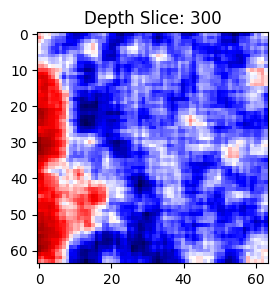

In [30]:
plt.figure(figsize=(3,3))
plt.title('Depth Slice: 300')
plt.imshow(seismic[...,256], cmap=plt.cm.seismic)
plt.show()

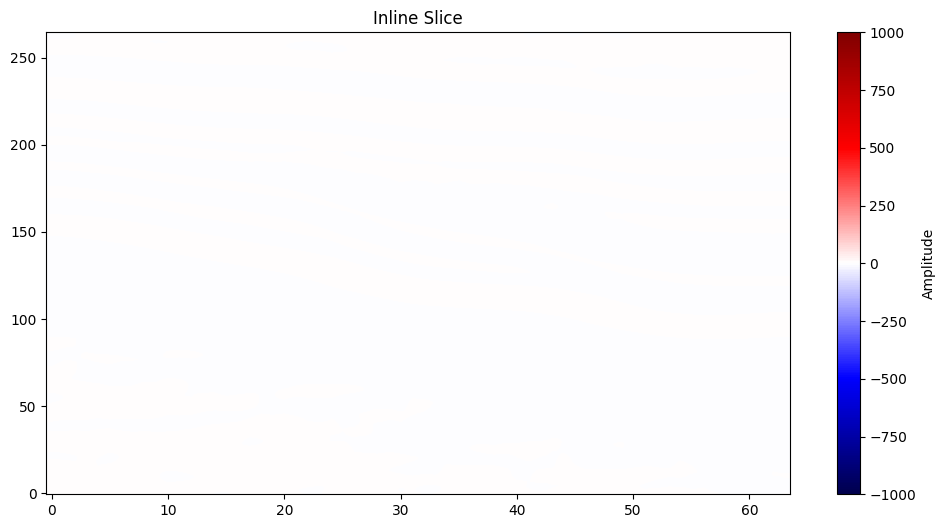

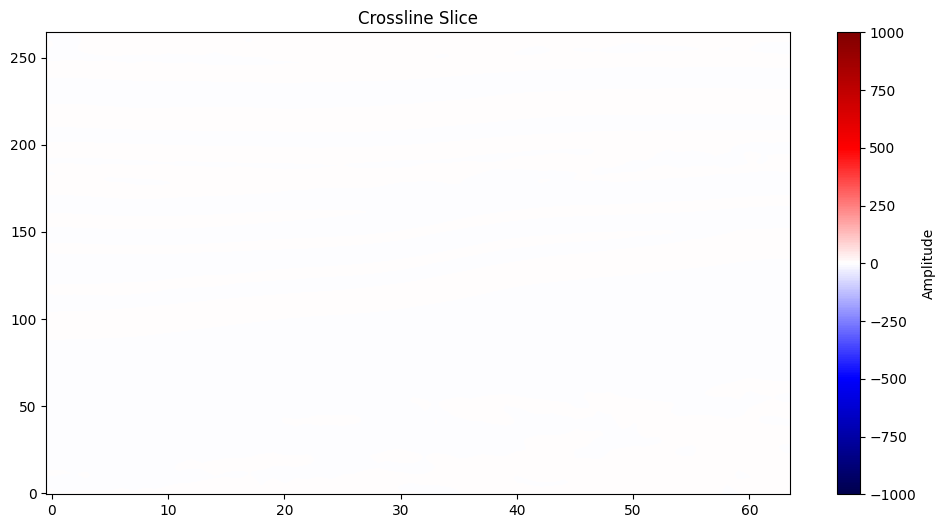

In [31]:
import matplotlib.pyplot as plt
inline_index = seismic.shape[0] // 2      # middle inline
crossline_index = seismic.shape[1] // 2   # middle crossline

inline = seismic[inline_index, :, :]      # shape [crossline, depth]
crossline = seismic[:, crossline_index, :] # shape [inline, depth]

# Plot inline
plt.figure(figsize=(12, 6))
plt.imshow(
    inline.T,         # transpose so depth is vertical
    cmap="seismic",           # Start with grayscale
    aspect="auto",
    interpolation="bilinear",  # Smooth interpolation
    vmin=-1e3, vmax=1e3      # Gentle clipping for smooth look
)
plt.colorbar(label="Amplitude")
plt.title("Inline Slice")
plt.gca().invert_yaxis()  # depth/time goes down
plt.show()

# Plot crossline
plt.figure(figsize=(12, 6))
plt.imshow(
    crossline.T,
    cmap="seismic",           # Start with grayscale
    aspect="auto",
    interpolation="bilinear",  # Smooth interpolation
    vmin=-1e3, vmax=1e3      # Gentle clipping for smooth look
)
plt.colorbar(label="Amplitude")
plt.title("Crossline Slice")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
np.save('/raid/ridhwan/synthoseis/config/realistic not smooth/not_smooth2.npy', seismic)

In [11]:
seismic_nmf = np.load('/raid/ridhwan/synthoseis/synthoseis_example/seismic__2025.59729978_1/seismicCubes_RFC_fullstack_2025.59729978.npy')
print(seismic_nmf.shape)

(64, 64, 265)


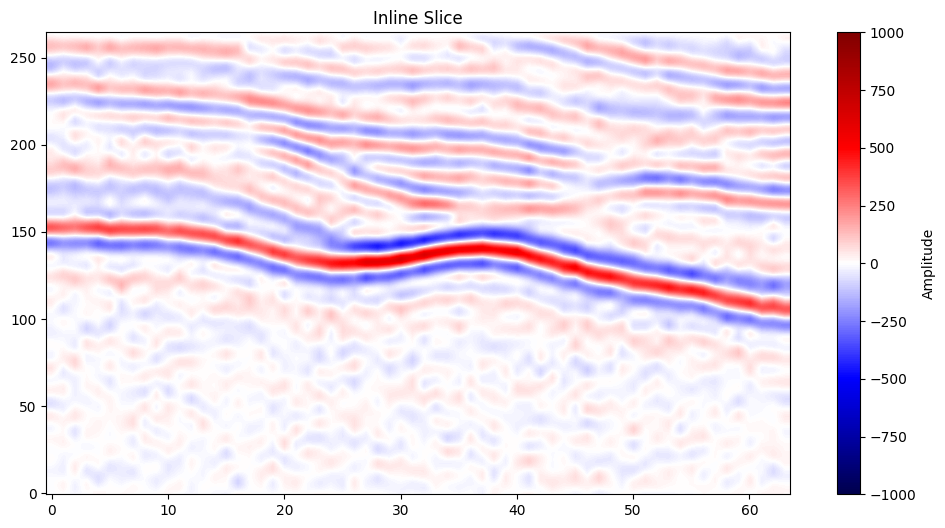

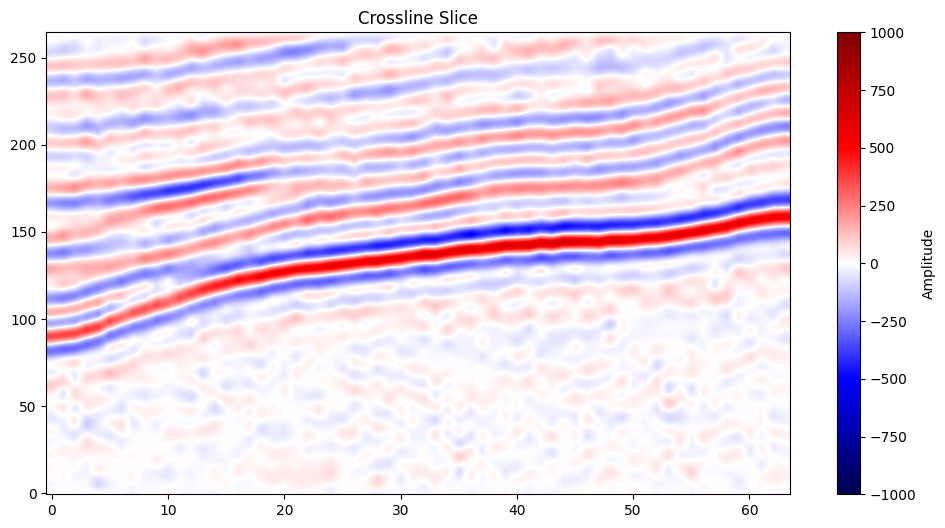

In [ ]:
import matplotlib.pyplot as plt
inline_index = seismic_nmf.shape[0] // 2      # middle inline
crossline_index = seismic_nmf.shape[1] // 2   # middle crossline

inline = seismic_nmf[inline_index, :, :]      # shape [crossline, depth]
crossline = seismic_nmf[:, crossline_index, :] # shape [inline, depth]

# Plot inline
plt.figure(figsize=(12, 6))
plt.imshow(
    inline.T,         # transpose so depth is vertical
    cmap="seismic",           # Start with grayscale
    aspect="auto",
    interpolation="bilinear",  # Smooth interpolation
    vmin=-1e3, vmax=1e3      # Gentle clipping for smooth look
)
plt.colorbar(label="Amplitude")
plt.title("Inline Slice")
plt.gca().invert_yaxis()  # depth/time goes down
plt.show()

# Plot crossline
plt.figure(figsize=(12, 6))
plt.imshow(
    crossline.T,
    cmap="seismic",           # Start with grayscale
    aspect="auto",
    interpolation="bilinear",  # Smooth interpolation
    vmin=-1e3, vmax=1e3      # Gentle clipping for smooth look
)
plt.colorbar(label="Amplitude")
plt.title("Crossline Slice")
plt.gca().invert_yaxis()
plt.show()
